In [1]:
import joblib
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from Python_Files.tuner import Tuner

In [2]:
# Load the preprocessed dataset (replace the path with your actual file path)
data = pd.read_csv('../data/norm_data.csv')

# Define features (X) and target (y)
X = data.copy()
y = X.pop('label')

# Split the dataset into training and test sets (using only 25% of the data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

joblib.dump(scaler, '../models/scaler.pkl')

['../models/scaler.pkl']

# Analysis of logisitc regression

## Default Model:  
- Trains a Logistic Regression model with default settings.
- Evaluates the model on the test data.

## Tuned Model:  

- Uses GridSearchCV to find the best settings (hyperparameters) for the Logistic Regression model.
- Trains the model with these best settings.
- Evaluates the tuned model on the test data.

## Cross-Validation:  

- Checks the average performance of both the default and tuned models using cross-validation (splitting the data into 5 parts and training/testing on each part).

## Results:  


### Default Model:  
- Accuracy: 0.999978 

### Tuned Model:  
- Accuracy: 0.999990 (slightly better than default)

### Cross-Validation:  
- Default model average accuracy: 0.999941
- Tuned model average accuracy: 0.999975
- Both models perform extremely well, with the tuned model being slightly better.

Create the tuner class

In [3]:
tuner_log_reg = Tuner(LogisticRegression(max_iter=1000), X_train, X_test, y_train, y_test)

Evaluate the default model

In [4]:
tuner_log_reg.evaluate()

Default model accuracy:
	0.9999279997695992
Default model Report:
              precision    recall  f1-score   support

  legitimate       1.00      1.00      1.00    937831
    phishing       1.00      1.00      1.00    937163

    accuracy                           1.00   1874994
   macro avg       1.00      1.00      1.00   1874994
weighted avg       1.00      1.00      1.00   1874994



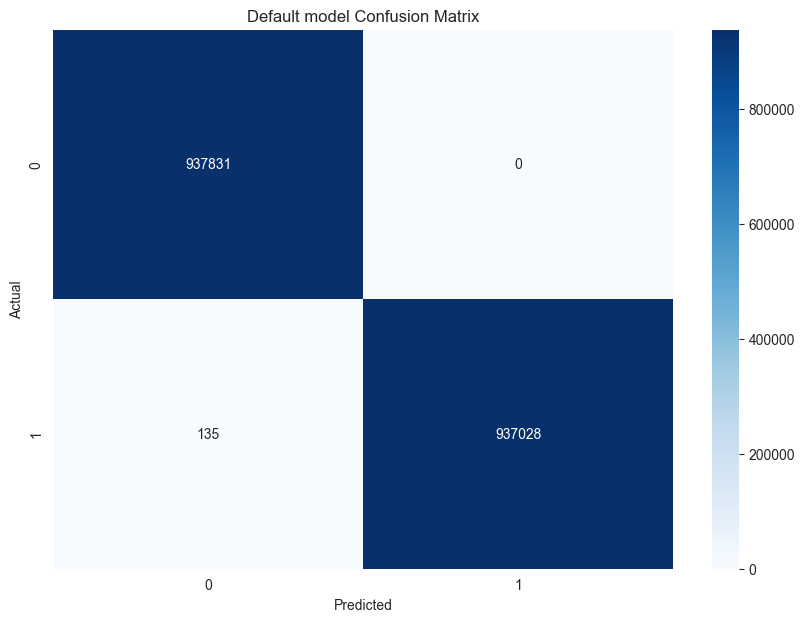

In [5]:
tuner_log_reg.confusion_matrix()

tune the model

In [6]:
param_grid_log_reg = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

tuner_log_reg.tune(param_grid=param_grid_log_reg)

Evaluate the best model

In [7]:
tuner_log_reg.evaluate(model='best')

Best model accuracy:
	0.9999706665727996
Best model Report:
              precision    recall  f1-score   support

  legitimate       1.00      1.00      1.00    937831
    phishing       1.00      1.00      1.00    937163

    accuracy                           1.00   1874994
   macro avg       1.00      1.00      1.00   1874994
weighted avg       1.00      1.00      1.00   1874994



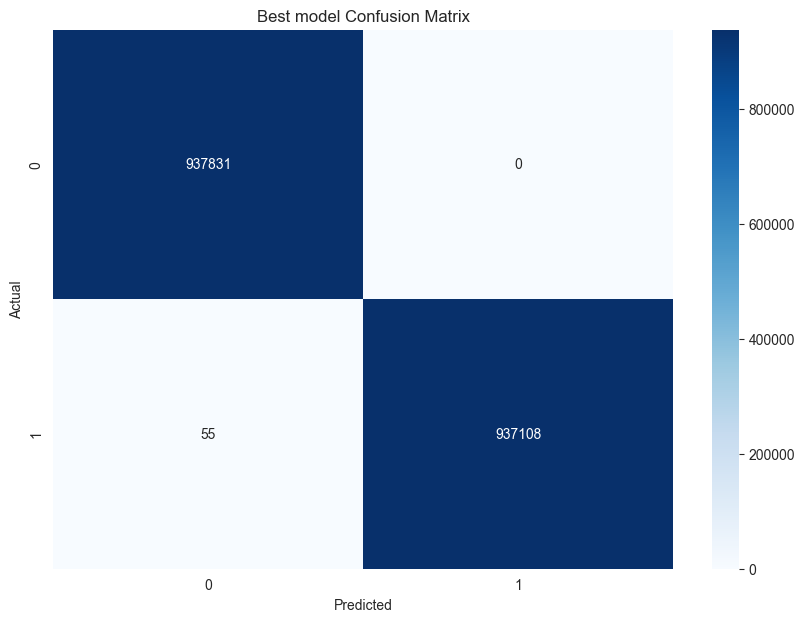

In [8]:
tuner_log_reg.confusion_matrix(model='best')

Perform cross validation

In [9]:
tuner_log_reg.cross_validation()

Default model Cross-Validation accuracy:
	0.9999471998463989


In [10]:
tuner_log_reg.cross_validation(model='best')

Best model Cross-Validation accuracy:
	0.9999743999103993


# Analysis of Decision Tree

## Default Model:

- Trains a Decision Tree model with default settings.
- Evaluates the model on the test data.

## Tuned Model:

- Uses GridSearchCV to find the best settings (hyperparameters) for the Decision Tree model.
- Trains the model with these best settings.
- Evaluates the tuned model on the test data.

## Cross-Validation:
- Checks the average performance of both the default and tuned models using cross-validation (splitting the data into 5 parts and training/testing on each part).

## Results:
Default Model:
- Accuracy: 0.999972
-  Detailed report shows precision, recall, and F1-score all close to 1.00 for both classes (0 and 1)

Tuned Model:
- Accuracy: 0.999972 (same as default)
- Detailed report shows precision, recall, and F1-score all close to 1.00 for both classes (0 and 1)

Cross-Validation:
- Default model average accuracy: 0.999985
- Tuned model average accuracy: 0.999986

Create the tuner class

In [11]:
tuner_tree_clf = Tuner(DecisionTreeClassifier(), X_train, X_test, y_train, y_test)

Evaluate the default model

In [12]:
tuner_tree_clf.evaluate()

Default model accuracy:
	0.9999647998873596
Default model Report:
              precision    recall  f1-score   support

  legitimate       1.00      1.00      1.00    937831
    phishing       1.00      1.00      1.00    937163

    accuracy                           1.00   1874994
   macro avg       1.00      1.00      1.00   1874994
weighted avg       1.00      1.00      1.00   1874994



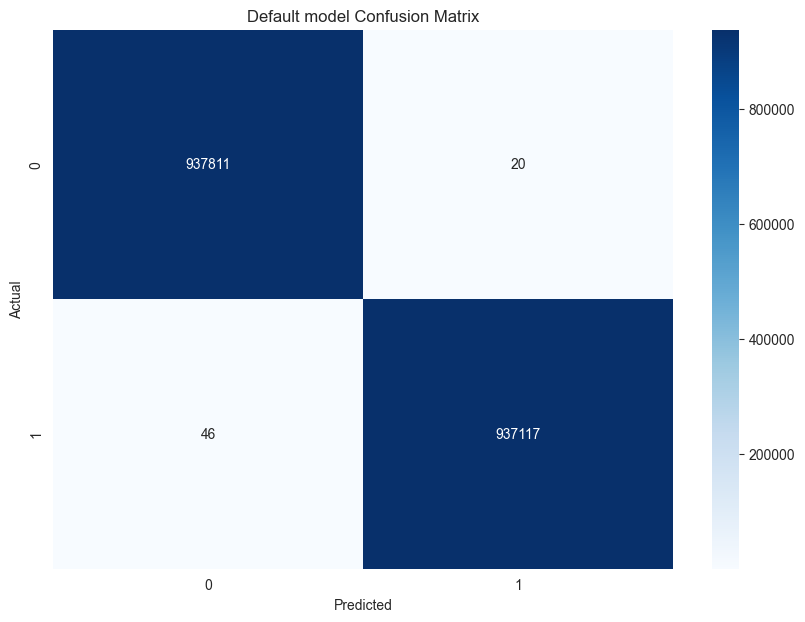

In [13]:
tuner_tree_clf.confusion_matrix()

tune the model

In [14]:
param_grid_tree_clf = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

tuner_tree_clf.tune(param_grid=param_grid_tree_clf)

Evaluate the best model

In [15]:
tuner_tree_clf.evaluate(model='best')

Best model accuracy:
	0.9999642665523196
Best model Report:
              precision    recall  f1-score   support

  legitimate       1.00      1.00      1.00    937831
    phishing       1.00      1.00      1.00    937163

    accuracy                           1.00   1874994
   macro avg       1.00      1.00      1.00   1874994
weighted avg       1.00      1.00      1.00   1874994



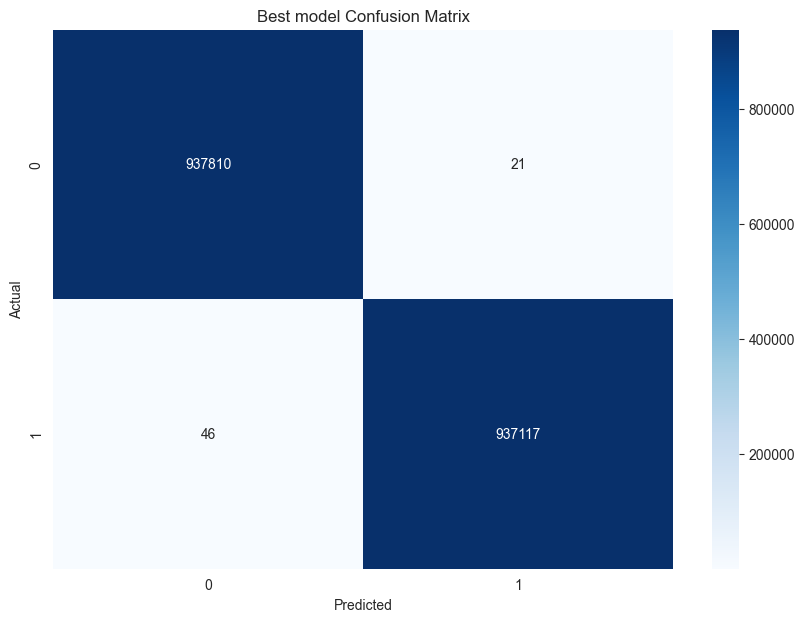

In [16]:
tuner_tree_clf.confusion_matrix(model='best')

Perform cross validation

In [17]:
tuner_tree_clf.cross_validation()

Default model Cross-Validation accuracy:
	0.9999519999359995


In [18]:
tuner_tree_clf.cross_validation(model='best')

Best model Cross-Validation accuracy:
	0.9999375998847991


# Analysis of Random Forest
### Default Model:
- Trains a Random Forest model with default settings.
- Evaluates the model on the test data.

### Tuned Model:
- Uses GridSearchCV to find the best settings (hyperparameters) for the Random Forest model.
- Trains the model with these best settings.
- Evaluates the tuned model on the test data.
### Cross-Validation:
- Checks the average performance of both the default and tuned models using cross-validation (splitting the data into 3 parts and training/testing on each part).
## Results:

### Default Model:
- Accuracy: 0.999991

### Tuned Model:
- Accuracy: 0.999992 (slightly better than default)


Create the tuner class

In [19]:
tuner_rf_clf = Tuner(RandomForestClassifier(), X_train, X_test, y_train, y_test)

Evaluate the default model

In [20]:
tuner_rf_clf.evaluate()

Default model accuracy:
	0.99999359997952
Default model Report:
              precision    recall  f1-score   support

  legitimate       1.00      1.00      1.00    937831
    phishing       1.00      1.00      1.00    937163

    accuracy                           1.00   1874994
   macro avg       1.00      1.00      1.00   1874994
weighted avg       1.00      1.00      1.00   1874994



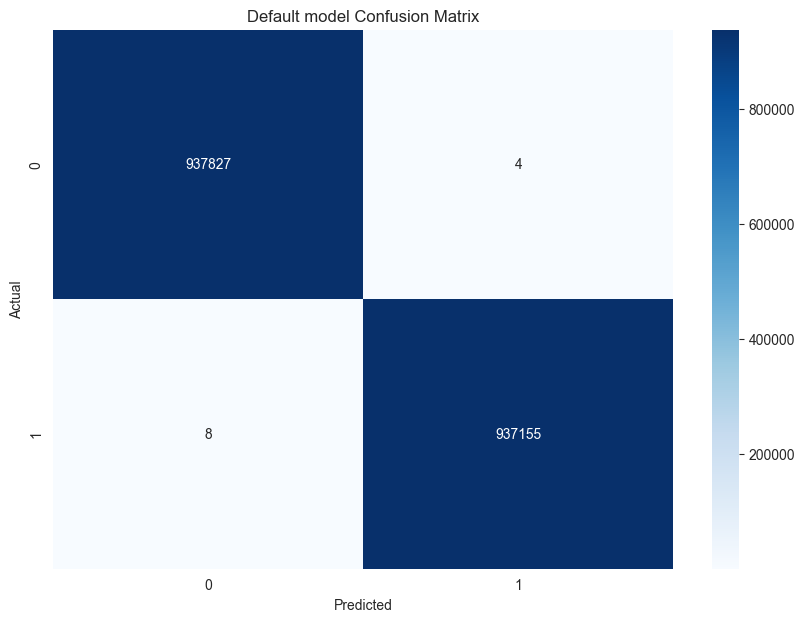

In [21]:
tuner_rf_clf.confusion_matrix()

tune the model

In [22]:
param_grid_rf_clf = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

tuner_rf_clf.tune(param_grid=param_grid_rf_clf)

Evaluate the best model

In [23]:
tuner_rf_clf.evaluate(model='best')

Best model accuracy:
	0.9999914666393599
Best model Report:
              precision    recall  f1-score   support

  legitimate       1.00      1.00      1.00    937831
    phishing       1.00      1.00      1.00    937163

    accuracy                           1.00   1874994
   macro avg       1.00      1.00      1.00   1874994
weighted avg       1.00      1.00      1.00   1874994



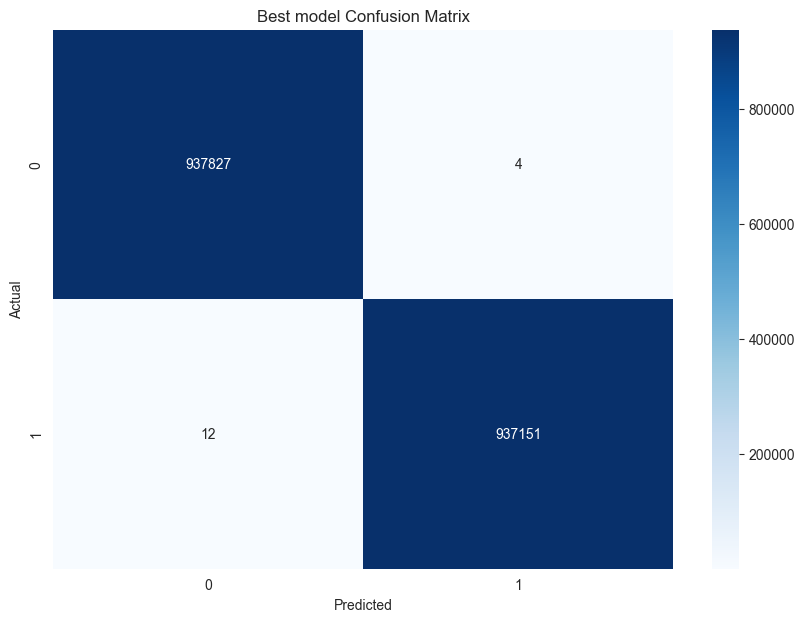

In [24]:
tuner_rf_clf.confusion_matrix(model='best')

Perform cross validation

In [25]:
tuner_rf_clf.cross_validation(cv=3)

Default model Cross-Validation accuracy:
	0.99999679999488


In [26]:
tuner_rf_clf.cross_validation(model='best', cv=3)

Best model Cross-Validation accuracy:
	0.9999935999820799


# Analysis of SVM
### Default Model:
- Trains an SVM model with default settings.
- Evaluates the model on the test data.
### Tuned Model:
- Uses GridSearchCV to find the best settings (hyperparameters) for the SVM model.
- Trains the model with these best settings.
= Evaluates the tuned model on the test data.
### Cross-Validation:
- Checks the average performance of both the default and tuned models using cross-validation (splitting the data into 3 parts and training/testing on each part).

## Results:

### Default Model:  
- Accuracy: 0.999976
- Detailed report shows precision, recall, and F1-score all close to 1.00 for both classes (0 and 1)
### Tuned Model:  
- Accuracy: 0.999987 (slightly better than default)
- Detailed report shows precision, recall, and F1-score all close to 1.00 for both classes (0 and 1)
### Cross-Validation:
- Default model average accuracy: 0.999976
- Tuned model average accuracy: 0.999979

Create the tuner class

In [27]:
tuner_svm_clf = Tuner(SVC(), X_train, X_test, y_train, y_test)

Evaluate the default model

In [28]:
tuner_svm_clf.evaluate()

Default model accuracy:
	0.9999791999334398
Default model Report:
              precision    recall  f1-score   support

  legitimate       1.00      1.00      1.00    937831
    phishing       1.00      1.00      1.00    937163

    accuracy                           1.00   1874994
   macro avg       1.00      1.00      1.00   1874994
weighted avg       1.00      1.00      1.00   1874994



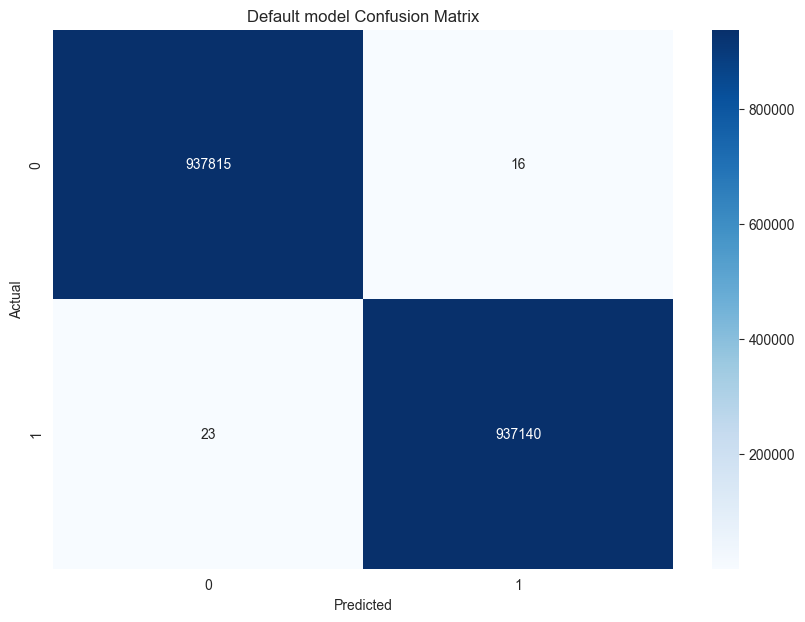

In [29]:
tuner_svm_clf.confusion_matrix()

tune the model

In [30]:
param_grid_svm_clf = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

tuner_svm_clf.tune(param_grid=param_grid_svm_clf, verbose=3)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


Evaluate the best model

In [31]:
tuner_svm_clf.evaluate(model='best')

Best model accuracy:
	0.9999781332633598
Best model Report:
              precision    recall  f1-score   support

  legitimate       1.00      1.00      1.00    937831
    phishing       1.00      1.00      1.00    937163

    accuracy                           1.00   1874994
   macro avg       1.00      1.00      1.00   1874994
weighted avg       1.00      1.00      1.00   1874994



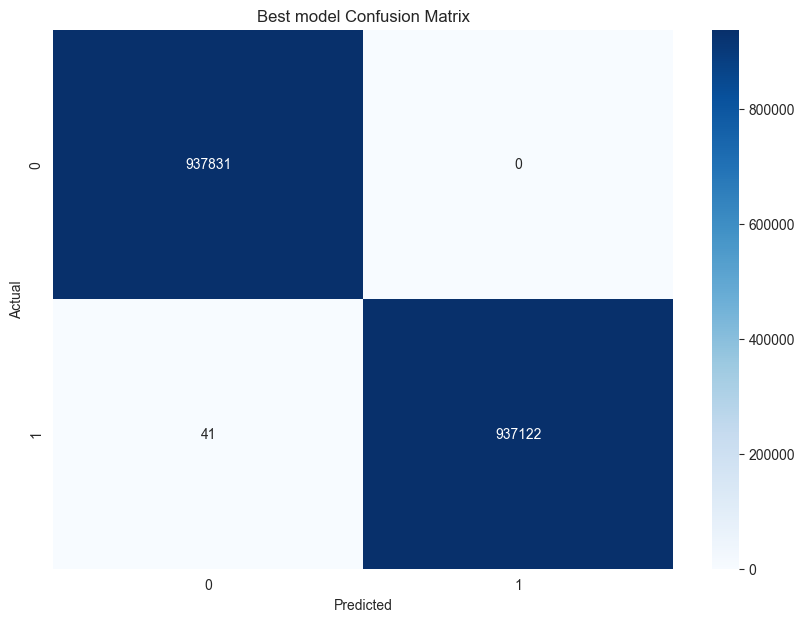

In [32]:
tuner_svm_clf.confusion_matrix(model='best')

Perform cross validation

In [33]:
tuner_svm_clf.cross_validation(cv=3)

Default model Cross-Validation accuracy:
	0.9999727999027194


In [34]:
tuner_svm_clf.cross_validation(model='best', cv=3)

Best model Cross-Validation accuracy:
	0.9999871999641599


# Analysis of Bad Model

Here i created a worse model by having a decision tree with a max depth of 1. This model is expected to perform poorly compared to the other models.
Then i use hyperparameter tuning to improve the model and compare the results with the tuned model. This gives a more noticable imporvement in the model. Compared to the other models, the bad model has a lower accuracy and F1-score.

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features (X) and target (y)
X = data.copy()
y = X.pop('label')

# Convert the target labels to binary format
y = y.map({'phishing': 1, 'legitimate': 0})

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the Decision Tree classifier with limited depth
bad_model = DecisionTreeClassifier(max_depth=1)

# Train the bad model with default parameters
bad_model.fit(X_train, y_train)

# Evaluate the bad model
bad_model_pred = bad_model.predict(X_test)
print("Bad Model Accuracy: ", accuracy_score(y_test, bad_model_pred))
print("Bad Model Report:\n", classification_report(y_test, bad_model_pred, zero_division=0))

# Perform cross-validation on the bad model
bad_model_scores = cross_val_score(bad_model, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1)
print("Bad Model Cross-Validation Accuracy: ", bad_model_scores.mean())

# Define parameter grid for DecisionTreeClassifier
param_grid_tree = {
    'max_depth': [1, 2, 3, 4, 5],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV with DecisionTreeClassifier
grid_tree_clf = GridSearchCV(DecisionTreeClassifier(), param_grid_tree, cv=5, scoring='accuracy', n_jobs=-1)
grid_tree_clf.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_tree_clf = grid_tree_clf.best_estimator_

# Evaluate the best model
tree_clf_pred = best_tree_clf.predict(X_test)
print("Tuned Decision Tree Accuracy: ", accuracy_score(y_test, tree_clf_pred))
print("Tuned Decision Tree Report:\n", classification_report(y_test, tree_clf_pred, zero_division=0))

# Perform cross-validation on the tuned model
tuned_tree_scores = cross_val_score(best_tree_clf, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1)
print("Tuned Decision Tree Cross-Validation Accuracy: ", tuned_tree_scores.mean())

Bad Model Accuracy:  0.9443502219207102
Bad Model Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95    937831
           1       0.97      0.92      0.94    937163

    accuracy                           0.94   1874994
   macro avg       0.95      0.94      0.94   1874994
weighted avg       0.95      0.94      0.94   1874994

Bad Model Cross-Validation Accuracy:  0.9436798193552915
Tuned Decision Tree Accuracy:  0.9990490636236703
Tuned Decision Tree Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    937831
           1       1.00      1.00      1.00    937163

    accuracy                           1.00   1874994
   macro avg       1.00      1.00      1.00   1874994
weighted avg       1.00      1.00      1.00   1874994

Tuned Decision Tree Cross-Validation Accuracy:  0.9993855986252753


## Save the best model

In [36]:
tuner_rf_clf.save_best_model(model_path='../models/random_forest.pkl')